In [1]:
from pathlib import Path

### Load data

In [2]:
TRAIN_POS_DIR = Path("./aclImdb/train/pos")
TRAIN_NEG_DIR = Path("./aclImdb/train/neg")
TEST_POS_DIR = Path("./aclImdb/test/pos")
TEST_NEG_DIR = Path("./aclImdb/test/neg")

assert (
    TRAIN_POS_DIR.exists()
    and TRAIN_NEG_DIR.exists()
    and TEST_POS_DIR.exists()
    and TEST_NEG_DIR.exists()
)
assert (
    TRAIN_POS_DIR.is_dir()
    and TRAIN_NEG_DIR.is_dir()
    and TEST_POS_DIR.is_dir()
    and TEST_NEG_DIR.is_dir()
)

In [3]:
def load_train_data(
    train_pos_dir: Path = TRAIN_POS_DIR,
    train_neg_dir: Path = TRAIN_NEG_DIR,
) -> tuple[list[str], list[int]]:
    """
    Loads training data from the specified positive and negative directories.

    Each directory is expected to contain text files named in the format '{id}_{label}.txt',
    where 'id' is an integer in [0, 12499] and 'label' is an integer in [1, 10].

    Args:
        train_pos_dir: Path to the directory containing positive samples.
        train_neg_dir: Path to the directory containing negative samples.

    Returns:
        A tuple containing:
            - all_texts: list of review texts (str)
            - all_labels: list of corresponding integer labels
    """
    all_texts = []
    all_labels = []
    for dir in train_pos_dir, train_neg_dir:
        for file in dir.glob("*.txt"):
            id, label = map(int, file.name.strip(".txt").split("_"))

            assert 0 <= id <= 12499
            assert 1 <= label <= 10
            
            text = file.read_text()
            all_texts.append(text)
            all_labels.append(label)
        
    assert len(all_texts) == 25000

    return all_texts, all_labels


In [4]:
all_texts, all_labels = load_train_data()

In [5]:
all_texts[:3], all_labels[:3]

(['For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.',
  'Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV\'s "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina\'s pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D\'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police det

### Tokenization

In [6]:
from preprocessing import full_preprocess_document
from nltk.stem.porter import PorterStemmer

# Initialize stemmer
porter_stemmer = PorterStemmer()

all_texts_tokenized = [full_preprocess_document(text, stemmer_instance=porter_stemmer) for text in all_texts]

In [7]:
[tokens[:5]+["..."] for tokens in all_texts_tokenized[:3]]

[['for', 'a', 'movi', 'that', 'get', '...'],
 ['bizarr', 'horror', 'movi', 'fill', 'with', '...'],
 ['a', 'solid', 'if', 'unremark', 'film', '...']]

In [8]:
unique_tokens = set(token for tokens in all_texts_tokenized for token in tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 74519


### Remove frequent tokens

Here, we will find the tokens appearing in more than X% of all documents and remove them

In [9]:
from collections import Counter

def get_token_document_frequencies(tokenized_texts: list[list[str]]) -> dict[str, int]:
    """
    Returns a dictionary mapping each token to the number of documents it appears in.
    """
    doc_freq_counter: Counter[str] = Counter()
    for tokens in tokenized_texts:
        unique_tokens = set(tokens)
        doc_freq_counter.update(unique_tokens)
    return dict(doc_freq_counter)

def find_frequent_tokens(
    tokenized_texts: list[list[str]], 
    percentage: float
) -> set[str]:
    """
    Returns a set of tokens that appear in more than `percentage` percent of documents.
    `percentage` should be a float between 0 and 100 (inclusive), representing a percentage.
    For example, percentage=90 means tokens appearing in more than 90% of documents.
    """
    doc_count = len(tokenized_texts)
    doc_freqs = get_token_document_frequencies(tokenized_texts)
    return {
        token
        for token, freq in doc_freqs.items()
        if (freq / doc_count) * 100 > percentage
    }

percentage = 1.0  # percentage: tokens must appear in more than <percentage>% of documents
tokens_to_remove = find_frequent_tokens(all_texts_tokenized, percentage)
sorted(list(tokens_to_remove))

['1',
 '10',
 '100',
 '12',
 '15',
 '2',
 '20',
 '3',
 '30',
 '4',
 '40',
 '5',
 '50',
 '6',
 '60',
 '7',
 '70',
 "70'",
 '8',
 '80',
 "80'",
 '9',
 '90',
 'a',
 'abandon',
 'abil',
 'abl',
 'about',
 'abov',
 'absolut',
 'absurd',
 'abus',
 'academi',
 'accent',
 'accept',
 'accid',
 'accomplish',
 'accord',
 'account',
 'accur',
 'achiev',
 'across',
 'act',
 'action',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addit',
 'admir',
 'admit',
 'adult',
 'advanc',
 'adventur',
 'affair',
 'affect',
 'afraid',
 'after',
 'again',
 'against',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aim',
 'air',
 'alien',
 'aliv',
 'all',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'also',
 'although',
 'alway',
 'am',
 'amaz',
 'america',
 'american',
 'among',
 'amount',
 'amus',
 'an',
 'and',
 'angel',
 'angl',
 'angri',
 'ani',
 'anim',
 'ann',
 'annoy',
 'anoth',
 'answer',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'anyway',
 'anywher',
 'apart',
 'appar',
 

In [10]:
print(f"Number of tokens to remove: {len(tokens_to_remove)}")
print(f"Number of unique tokens after removal: {len(unique_tokens - tokens_to_remove)}")

Number of tokens to remove: 1757
Number of unique tokens after removal: 72762


In [11]:
filtered_texts_tokenized = [
    [token for token in tokens if token not in tokens_to_remove]
    for tokens in all_texts_tokenized
]

print("Before removal:")
for tokens in all_texts_tokenized[:3]:  
    print(tokens[:10]+["..."])
print("After removal:")
for tokens in filtered_texts_tokenized[:3]:
    print(tokens[:10]+["..."])

Before removal:
['for', 'a', 'movi', 'that', 'get', 'no', 'respect', 'there', 'sure', 'are', '...']
['bizarr', 'horror', 'movi', 'fill', 'with', 'famou', 'face', 'but', 'stolen', 'by', '...']
['a', 'solid', 'if', 'unremark', 'film', 'matthau', 'as', 'einstein', 'wa', 'wonder', '...']
After removal:
['piscopo', 'maureen', 'stapleton', 'stealer', 'moroni', 'alan', 'skipper', 'hale', 'jr', 'sgt', '...']
['stolen', 'cristina', 'rain', "tv'", 'flamingo', 'unstabl', 'gummi', 'slate', 'guard', 'gateway', '...']
['unremark', 'matthau', 'einstein', 'physicist', 'badmitton', 'sweater', 'robbin', 'retriev', 'birdi', '...']


### Final vocabulary

In [12]:
vocabulary = list(sorted(unique_tokens - tokens_to_remove))
print(f"Vocabulary size: {len(vocabulary)}")
vocabulary[:10]

Vocabulary size: 72762


['0',
 "0'",
 '0-10guinea',
 '0-5',
 '0-star',
 '00',
 "00'",
 '000',
 '000-4',
 '000-odd']

### Bag of words

In [13]:
import numpy as np

In [14]:
# Create the BoW matrix for the training data (dense version, commented out)
# num_train_documents = len(filtered_texts_tokenized)
# vocab_size = len(vocabulary)
# X_train_custom_bow = np.zeros((num_train_documents, vocab_size), dtype=np.int32)
# vocabulary_map = {token: i for i, token in enumerate(vocabulary)}
# for i, doc_tokens in enumerate(filtered_texts_tokenized):
#     for token in doc_tokens:
#         if token in vocabulary_map:
#             X_train_custom_bow[i, vocabulary_map[token]] += 1
# print(f"Shape of custom BoW training matrix: {X_train_custom_bow.shape}")

# --- Sparse matrix version ---
from scipy.sparse import lil_matrix, csr_matrix

num_train_documents = len(filtered_texts_tokenized)
vocab_size = len(vocabulary)
vocabulary_map = {token: i for i, token in enumerate(vocabulary)}

# Use LIL for efficient row-wise construction
X_train_custom_bow_sparse = lil_matrix((num_train_documents, vocab_size), dtype=np.int32)

for i, doc_tokens in enumerate(filtered_texts_tokenized):
    for token in doc_tokens:
        idx = vocabulary_map.get(token)
        if idx is not None:
            X_train_custom_bow_sparse[i, idx] += 1

# Convert to CSR for efficient arithmetic and slicing
X_train_custom_bow = X_train_custom_bow_sparse.tocsr()

print(f"Shape of custom sparse BoW training matrix: {X_train_custom_bow.shape}")

Shape of custom sparse BoW training matrix: (25000, 72762)


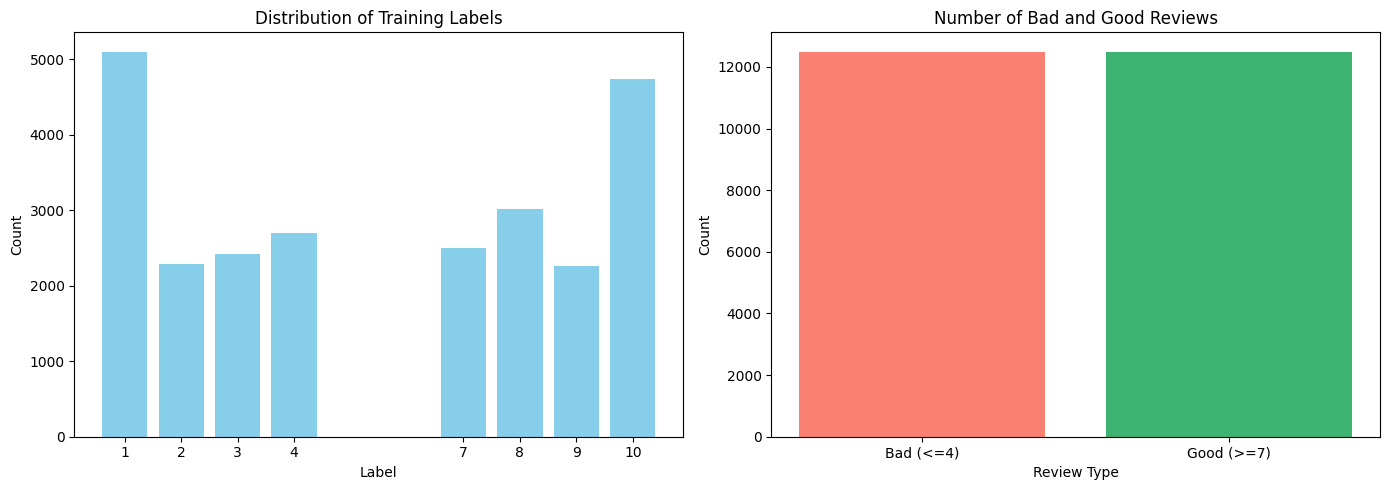

In [15]:
import matplotlib.pyplot as plt

def plot_label_and_good_bad_distribution(labels: np.ndarray) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Distribution of all labels
    values, counts = np.unique(labels, return_counts=True)
    axs[0].bar(values, counts, color='skyblue')
    axs[0].set_xlabel('Label')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Distribution of Training Labels')
    axs[0].set_xticks(values)

    # Plot 2: Good vs Bad reviews
    bad_count = np.sum(labels <= 4)
    good_count = np.sum(labels >= 7)
    axs[1].bar(['Bad (<=4)', 'Good (>=7)'], [bad_count, good_count], color=['salmon', 'mediumseagreen'])
    axs[1].set_xlabel('Review Type')
    axs[1].set_ylabel('Count')
    axs[1].set_title('Number of Bad and Good Reviews')

    plt.tight_layout()
    plt.show()

plot_label_and_good_bad_distribution(np.array(all_labels))

### Create y_train_custom_bow

Currently, `all_labels` contains values from 1 to 10, but we want 0 or 1

In [16]:
y_train_custom_bow = np.array([1 if label >= 7 else 0 for label in all_labels])

print(f"Shape of custom BoW training labels: {y_train_custom_bow.shape}")


assert X_train_custom_bow.shape[0] == len(y_train_custom_bow)

y_train_custom_bow[:20], y_train_custom_bow[-20:]

Shape of custom BoW training labels: (25000,)


(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

### Load test data

In [17]:
def load_test_data(
    test_pos_dir: Path = TEST_POS_DIR,
    test_neg_dir: Path = TEST_NEG_DIR,
) -> tuple[list[str], list[int]]:
    all_texts_test = []
    all_labels_test = []
    for dir_path in [test_pos_dir, test_neg_dir]:
        for file in dir_path.glob("*.txt"):
            _, label = map(int, file.name.strip(".txt").split("_"))
            text = file.read_text(encoding='utf-8')
            all_texts_test.append(text)
            all_labels_test.append(label)
    
    assert len(all_texts_test) == 25000
    return all_texts_test, all_labels_test

X_test_raw, y_test_raw_labels = load_test_data()
print(f"Loaded {len(X_test_raw)} test documents.")

for text in X_test_raw[:3]:
    print(text[:100] + "...")


Loaded 25000 test documents.
Based on an actual story, John Boorman shows the struggle of an American doctor, whose husband and s...
This is a gem. As a Film Four production - the anticipated quality was indeed delivered. Shot with g...
I really like this show. It has drama, romance, and comedy all rolled into one. I am 28 and I am a m...


In [18]:

X_test_tokenized_full_pipeline = [
    full_preprocess_document(text, tokens_to_remove=tokens_to_remove, stemmer_instance=porter_stemmer)
    for text in X_test_raw
]
print(f"Preprocessed {len(X_test_tokenized_full_pipeline)} test documents.")

Preprocessed 25000 test documents.


In [19]:
for tokens in X_test_tokenized_full_pipeline[:3]:
    print(tokens[:10]+["..."])

['base', 'stori', 'boorman', 'show', 'struggl', 'murder', 'wa', 'continu', 'plagu', 'holiday', '...']
['thi', 'product', 'anticip', 'qualiti', 'wa', 'inde', 'deliv', 'remind', 'errol', 'morri', '...']
['realli', 'thi', 'ha', 'romanc', 'comedi', 'roll', '28', 'marri', 'identifi', "lorelei'", '...']


In [20]:
from scipy.sparse import lil_matrix

num_test_documents = len(X_test_tokenized_full_pipeline)
X_test_custom_bow = lil_matrix((num_test_documents, vocab_size), dtype=np.int32)

for i, doc_tokens in enumerate(X_test_tokenized_full_pipeline):
    for token in doc_tokens:
        if token in vocabulary_map:  # Only use tokens present in the training vocabulary
            X_test_custom_bow[i, vocabulary_map[token]] += 1

X_test_custom_bow = X_test_custom_bow.tocsr()  # Convert to CSR format for efficient row slicing
print(f"Shape of custom BoW test matrix: {X_test_custom_bow.shape}")

Shape of custom BoW test matrix: (25000, 72762)


In [21]:
y_test_custom_bow = np.array([1 if label >= 7 else 0 for label in y_test_raw_labels])
print(f"Shape of custom BoW test labels: {y_test_custom_bow.shape}")
assert X_test_custom_bow.shape[0] == len(y_test_custom_bow)

Shape of custom BoW test labels: (25000,)


## Train a simple classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, max_depth=None, min_samples_leaf=4, min_samples_split=10)

print("Training Random Forest on custom BoW...")
rf_classifier.fit(X_train_custom_bow, y_train_custom_bow)

print("Predicting on the test set...")
y_pred_custom = rf_classifier.predict(X_test_custom_bow)

accuracy_custom = accuracy_score(y_test_custom_bow, y_pred_custom)
print(f"\nAccuracy on test set (custom BoW): {accuracy_custom:.4f}")

print("\nClassification Report (custom BoW):")
print(classification_report(y_test_custom_bow, y_pred_custom, target_names=['Negative (0)', 'Positive (1)']))

Training Random Forest on custom BoW...
Predicting on the test set...

Accuracy on test set (custom BoW): 0.7458

Classification Report (custom BoW):
              precision    recall  f1-score   support

Negative (0)       0.75      0.74      0.74     12500
Positive (1)       0.74      0.75      0.75     12500

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000



In [23]:
import joblib
import os
import glob

# --- Saving the model ---
from datetime import datetime
model_filename = f'random_forest_sentiment_classifier_{datetime.now().strftime("%Y%m%d_%H%M%S")}.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Trained Random Forest model saved to {model_filename}")

# To load the model later:

model_files = glob.glob('random_forest_sentiment_classifier_*.joblib')
if model_files:
    latest_model = max(model_files, key=os.path.getctime)
    print(f"Loading the latest model: {latest_model}")
    loaded_rf_classifier = joblib.load(latest_model)
else:
    print("No model files found in the current directory.")

Trained Random Forest model saved to random_forest_sentiment_classifier_20250508_234628.joblib
Loading the latest model: random_forest_sentiment_classifier_20250508_234628.joblib


Top 20 most important features (tokens):
1. unfunni (0.0078)
2. lousi (0.0063)
3. refresh (0.0056)
4. atroci (0.0055)
5. underr (0.0055)
6. 0 (0.0053)
7. amateurish (0.0051)
8. tediou (0.0051)
9. uninterest (0.0042)
10. incoher (0.0042)
11. pile (0.0041)
12. asleep (0.0041)
13. unwatch (0.0041)
14. mst3k (0.0041)
15. amateur (0.0041)
16. appal (0.0040)
17. stinker (0.0040)
18. asham (0.0039)
19. unintent (0.0037)
20. forgett (0.0036)


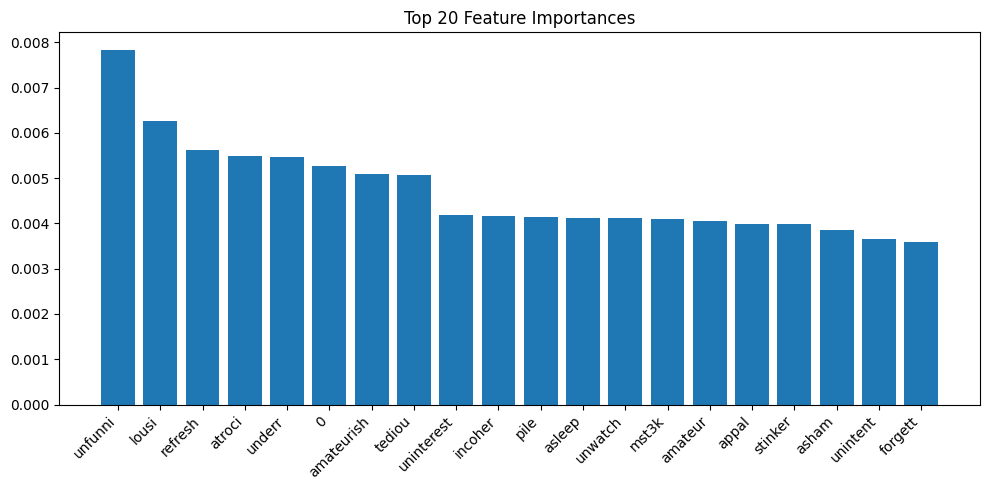

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest and 'vocabulary' is your list of features
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1] # Sort in descending order

print("Top 20 most important features (tokens):")
for i in range(20):
    print(f"{i+1}. {vocabulary[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot feature importances (optional)
plt.figure(figsize=(10, 5))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), [vocabulary[i] for i in indices[:20]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Grid search

In [25]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# import numpy as np # Ensure numpy is imported

# # 1. Define the parameter grid
# # These are example parameters and ranges. Adjust them based on
# # how much time you're willing to spend and your initial observations.
# param_grid = {
#     'n_estimators': [50, 100, 200],          # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
#     # 'max_features': ['sqrt', 'log2', None] # Number of features to consider when looking for the best split
#                                             # 'None' means max_features=n_features. Default is 'sqrt'.
#                                             # For high-dimensional data, 'sqrt' or 'log2' are often good.
# }

# # 2. Create a Random Forest Classifier instance
# # We'll use this as the base estimator for GridSearchCV
# rf_for_grid = RandomForestClassifier(random_state=42, n_jobs=-1) # n_jobs=-1 uses all processors

# # 3. Instantiate GridSearchCV
# # cv=3 means 3-fold cross-validation. You can increase this (e.g., 5) for more robust evaluation,
# # but it will take longer.
# # scoring='accuracy' means GridSearchCV will try to optimize for accuracy.
# # You could also use 'f1_macro', 'f1_weighted', 'roc_auc', etc.
# grid_search = GridSearchCV(estimator=rf_for_grid,
#                            param_grid=param_grid,
#                            cv=3, # Number of cross-validation folds
#                            scoring='accuracy', # Metric to optimize
#                            verbose=2, # Higher number for more messages
#                            n_jobs=-1) # Use all available cores for GridSearchCV itself (parallelizes CV folds)

# # 4. Fit GridSearchCV to your training data
# # This will be the most time-consuming step.
# print("Starting GridSearchCV... This may take a while.")
# # Ensure you are using the correct training data variables.
# # If you used sparse matrices:
# # grid_search.fit(X_train_custom_bow_sparse, y_train_custom_bow)
# # If you used dense matrices (from your previous run that yielded 0.7348 accuracy):
# grid_search.fit(X_train_custom_bow, y_train_custom_bow) # Assuming this is your dense training BoW

# # 5. Get the best parameters and the best score
# print("\nGridSearchCV Best Parameters Found:")
# print(grid_search.best_params_)

# print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# # 6. Use the best estimator to make predictions on the test set
# best_rf_model = grid_search.best_estimator_ # This is a RandomForestClassifier with the best found params

# print("\nEvaluating the best model found by GridSearchCV on the test set...")
# # If you used sparse matrices for grid_search.fit:
# # y_pred_grid_best = best_rf_model.predict(X_test_custom_bow_sparse)
# # If you used dense matrices for grid_search.fit:
# y_pred_grid_best = best_rf_model.predict(X_test_custom_bow) # Assuming this is your dense test BoW

# accuracy_grid_best = accuracy_score(y_test_custom_bow, y_pred_grid_best)
# print(f"\nAccuracy on test set (best RF from GridSearchCV): {accuracy_grid_best:.4f}")

# print("\nClassification Report (best RF from GridSearchCV):")
# print(classification_report(y_test_custom_bow, y_pred_grid_best, target_names=['Negative (0)', 'Positive (1)']))

# # You can also inspect all results:
# # import pandas as pd
# # cv_results_df = pd.DataFrame(grid_search.cv_results_)
# # print("\nFull GridSearchCV Results:")
# # print(cv_results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())






# GridSearchCV Best Parameters Found:
# {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

## Markov

In [26]:
from preprocessing import (
    clean_text_from_weird_chars,
    clean_html_tags,
    get_rid_of_non_alphanumeric_characters,
    keep_or_remove_dashes,
    tokenize_and_clean_tokens,
)


def preprocess_for_markov(raw_text: str) -> list[str]:
    text = clean_text_from_weird_chars(raw_text)
    text = clean_html_tags(text)
    text = text.lower()
    text = get_rid_of_non_alphanumeric_characters(text)
    text = keep_or_remove_dashes(text)
    tokens = tokenize_and_clean_tokens(text)
    return tokens


X_train_raw_texts_for_markov, _ = load_train_data()  # Reload raw training texts

corpus_for_markov = [
    preprocess_for_markov(text) for text in X_train_raw_texts_for_markov
]
# Add <START> and <END> tokens
corpus_for_markov_with_tags = [
    ["<START>"] + doc + ["<END>"] for doc in corpus_for_markov if doc
]

print(f"Processed {len(corpus_for_markov_with_tags)} documents for Markov chain.")
if corpus_for_markov_with_tags:
    print(f"Example: {corpus_for_markov_with_tags[0][:5] + ["..."] + corpus_for_markov_with_tags[0][-5:]}")

Processed 25000 documents for Markov chain.
Example: ['<START>', 'for', 'a', 'movie', 'that', '...', 'as', 'a', 'police', 'sgt', '<END>']


In [27]:
from itertools import pairwise


list(pairwise(corpus_for_markov_with_tags[0]))[:15]


[('<START>', 'for'),
 ('for', 'a'),
 ('a', 'movie'),
 ('movie', 'that'),
 ('that', 'gets'),
 ('gets', 'no'),
 ('no', 'respect'),
 ('respect', 'there'),
 ('there', 'sure'),
 ('sure', 'are'),
 ('are', 'a'),
 ('a', 'lot'),
 ('lot', 'of'),
 ('of', 'memorable'),
 ('memorable', 'quotes')]

In [28]:
from collections import defaultdict

# let's create a map that : 
# map each token to another dict, that maps the number of occurences of each possible next token

all_concatenated_tokens = [token for doc in corpus_for_markov_with_tags for token in doc]


map:dict[str, dict[str, int]] = {}
for token in set(all_concatenated_tokens):
    map[token] = defaultdict(int)

for doc in corpus_for_markov_with_tags:
    for i in range(len(doc) - 1):
        map[doc[i]][doc[i+1]] += 1


print("Top 10 next tokens for <START>:")
print(sorted(map["<START>"].items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 next tokens for i:")
print(sorted(map["i"].items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 next tokens for <START>:
[('i', 4605), ('this', 3595), ('the', 1665), ('a', 706), ('if', 373), ('in', 354), ('when', 322), ('what', 304), ('as', 297), ('it', 272)]
Top 10 next tokens for i:
[('was', 5339), ('have', 4539), ('think', 3279), ("don't", 2698), ('am', 2473), ('would', 2364), ('can', 1958), ('had', 1931), ('saw', 1842), ('thought', 1650)]


In [29]:
probability_map:dict[str, dict[str, float]] = {}
for token, next_tokens in map.items():
    total_count = sum(next_tokens.values())
    probability_map[token] = {next_token: count / total_count for next_token, count in next_tokens.items()}


sorted(probability_map["<START>"].items(), key=lambda x: x[1], reverse=True)[:10]

[('i', 0.1842),
 ('this', 0.1438),
 ('the', 0.0666),
 ('a', 0.02824),
 ('if', 0.01492),
 ('in', 0.01416),
 ('when', 0.01288),
 ('what', 0.01216),
 ('as', 0.01188),
 ('it', 0.01088)]

In [30]:
import random

def next_token(token: str, probability_map: dict[str, dict[str, float]]) -> str:
    return random.choices(list(probability_map[token].keys()), weights=list(probability_map[token].values()))[0]

def generate_sentence(probability_map: dict[str, dict[str, float]], max_length: int = 100) -> str:
    sentence = ["<START>"]
    while sentence[-1] != "<END>" and len(sentence) < max_length:
        sentence.append(next_token(sentence[-1], probability_map))
    return " ".join(sentence)

print(generate_sentence(probability_map))
print(generate_sentence(probability_map))
print(generate_sentence(probability_map))
print(generate_sentence(probability_map))
print(generate_sentence(probability_map))
print(generate_sentence(probability_map))


<START> an example of neil blomkamp made car parked anywhere near enough and filled with her body hair which though i thought billy visits ann is the hairdresser's husband nick granger an fantastic the director christian propaganda against a plain-looking hard-working enough takes to see it instead of your eye doesn't really make it is why and waffle <END>
<START> this movie at the killer's motive or to make more in this film itself wonderful villain too bad they completely unsympathetic role of montana yet intrigued by the south pacific at the lighter a very quickly if either way about it was straight and direction in this film worth pursuing is a misanthropic puppet government agent then but it came on an underdone but it's bettie's life he's an hour while it's a cruel would provide little to show preserved on there is always looked like this would get a decent into the clichéd characterisations the byplay among you
<START> years <END>
<START> i guess if you can it has no lover and w